<a href="https://colab.research.google.com/github/Amanhacks/DSML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 78.8MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.shape

(19820, 18)

In [4]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [5]:
df['model'].value_counts()

,count
model,
SWIFT DZIRE VDI,288
ALTO 800 LXI,189
WAGON R VXI,164
SWIFT VDI,150
SWIFT DZIRE VXI,136
...,...
CIAZ 1.4 AT DELTA,1
VENTURE LX,1
INNOVA CRYSTA 2016-2020 2.7 GX MT,1


In [6]:

df['make'] = df.groupby('make')['selling_price'].transform('mean')

In [7]:
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [8]:
#min_max_scaling

df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [9]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
# df.head()

In [10]:
y = df['selling_price']
y

x = df.drop('selling_price',axis=1)
x.shape, y.shape


((19820, 17), (19820,))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) #random_state decides the randomness
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15856, 17), (3964, 17), (15856,), (3964,))

In [12]:
#train the algorithm with X_train, y_train
#univariate

x_train_1 = x_train[['model']]
x_test_1 = x_test[['model']]

x_train_1.shape, y_train.shape

#check the performance of the model

((15856, 1), (15856,))

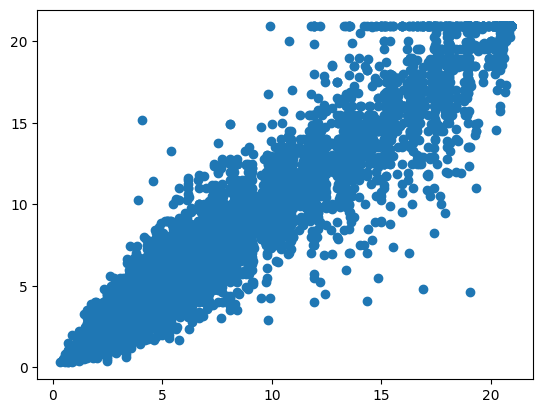

In [13]:
x_train_1.shape,y_train.shape
plt.scatter(x_train_1,y_train)

In [14]:
df.corr()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
selling_price,1.000000,0.390667,-0.100739,-0.314927,0.652296,0.770390,-0.390667,0.749553,0.968059,-0.201808,-0.019547,0.335236,0.019073,-0.053388,-0.313570,-0.582019,-0.234645,0.223282
year,0.390667,1.000000,-0.310288,0.262772,-0.054552,0.074124,-1.000000,-0.007605,0.332411,-0.017124,0.063389,0.026316,0.004328,-0.072595,-0.025883,-0.108357,-0.002936,0.023967
km_driven,-0.100739,-0.310288,1.000000,-0.090059,0.169491,0.007457,0.310288,0.024116,-0.069615,0.091550,-0.049455,0.249679,-0.002327,0.014153,-0.249359,0.084569,-0.136180,0.151401
mileage,-0.314927,0.262772,-0.090059,1.000000,-0.586985,-0.473775,-0.262772,-0.397677,-0.331557,0.069013,0.027321,0.108808,0.228299,-0.023325,-0.159073,0.263190,0.371743,-0.379429
engine,0.652296,-0.054552,0.169491,-0.586985,1.000000,0.791340,0.054552,0.631664,0.673462,-0.113243,-0.051005,0.453970,-0.001711,-0.049141,-0.425312,-0.368639,-0.517424,0.515238
max_power,0.770390,0.074124,0.007457,-0.473775,0.791340,1.000000,-0.074124,0.719000,0.794316,-0.195152,-0.031343,0.261586,-0.002934,-0.052945,-0.231222,-0.543705,-0.225431,0.194063
age,-0.390667,-1.000000,0.310288,-0.262772,0.054552,-0.074124,1.000000,0.007605,-0.332411,0.017124,-0.063389,-0.026316,-0.004328,0.072595,0.025883,0.108357,0.002936,-0.023967
make,0.749553,-0.007605,0.024116,-0.397677,0.631664,0.719000,0.007605,1.000000,0.774284,-0.195263,-0.033878,0.263077,0.012934,-0.027413,-0.244855,-0.552433,-0.147503,0.118870
model,0.968059,0.332411,-0.069615,-0.331557,0.673462,0.794316,-0.332411,0.774284,1.000000,-0.197741,-0.023565,0.346297,0.018631,-0.055150,-0.323890,-0.600678,-0.242382,0.230705
Individual,-0.201808,-0.017124,0.091550,0.069013,-0.113243,-0.195152,0.017124,-0.195263,-0.197741,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#model is trained
model.fit(x_train_1,y_train)

#w1
model.coef_

#w0
model.intercept_


np.float64(0.003851586536288032)

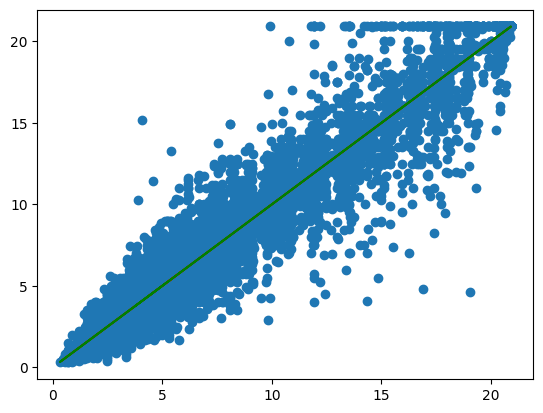

In [16]:
plt.scatter(x_train_1,y_train)
plt.plot(x_test_1,model.predict(x_test_1),color='red')
plt.plot(x_train_1,model.predict(x_train_1),color='green')



In [17]:
model.predict(x_train_1)[:10]

array([ 3.7763085 , 10.92024263,  6.88207199,  5.61257064,  2.84252622,
        7.74863068,  5.12982464,  5.96328876,  1.18705397,  2.18591003])

In [18]:
y_train[:10]

,selling_price
5662,5.25
4556,8.25
7094,7.50
1441,5.70
17079,4.00
8687,7.50
16301,4.85
19537,6.35
10004,0.90
5248,2.75


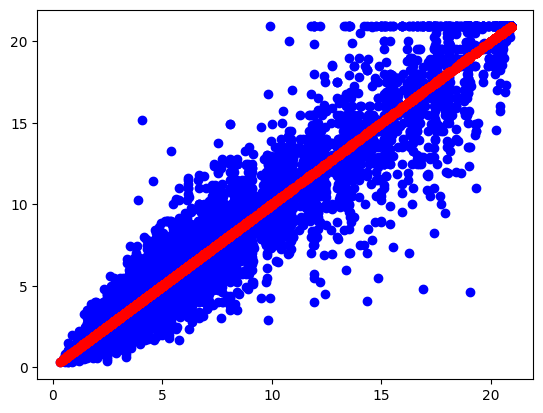

In [19]:
#Performance matric
## r2 score//coff of determination
model.score(x_train_1,y_train)




plt.scatter(x_train_1,y_train,c='b')
plt.scatter(x_train_1,model.predict(x_train_1),c='r')
plt.show()

In [20]:
#Mean abs error

np.abs(y_train - model.predict(x_train_1)).mean()

np.float64(0.7769026891139283)

In [21]:
#Mean square error


np.square(y_train - model.predict(x_train_1)).mean()



np.float64(1.489497038263128)

In [22]:
# r2 score (1 - (MSE of good model / MSE of average model ))

# Multi-variate  LinearRegression

In [23]:
y_train.head()
x_train.head()
y_train.shape, x_train.shape

((15856,), (15856, 17))

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [25]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
#calcualtion for r2 score
model.score(x_train,y_train)

0.9453672329447975

In [27]:
r2 = model.score(x_test,y_test)

In [28]:
n,d = x_train.shape



In [29]:
something = (1 - r2)*(n-1)/(n-d-1)
adjr2 = 1 - something

In [30]:
adjr2

0.9465624476593335

In [31]:
#impact of dimension
something = (1 - r2)*(n-1)/(n-1000-1)
adjr2 = 1 - something
print(adjr2)

0.943026324202526


In [32]:
model.coef_.round(2)

array([ 2.53, -4.72, -5.03,  1.83,  0.65, -2.53,  1.37, 17.69, -0.12,
       -0.17,  0.12,  2.48,  0.33, -0.2 , -0.09, -0.26, -0.42])

In [33]:
model.intercept_

np.float64(0.20181184269091723)

In [34]:
model.score(x_test,y_test)

0.9466197443095884

In [35]:
#model interpretability

import seaborn as sns
feature_imp = np.abs(model.coef_).round(3)

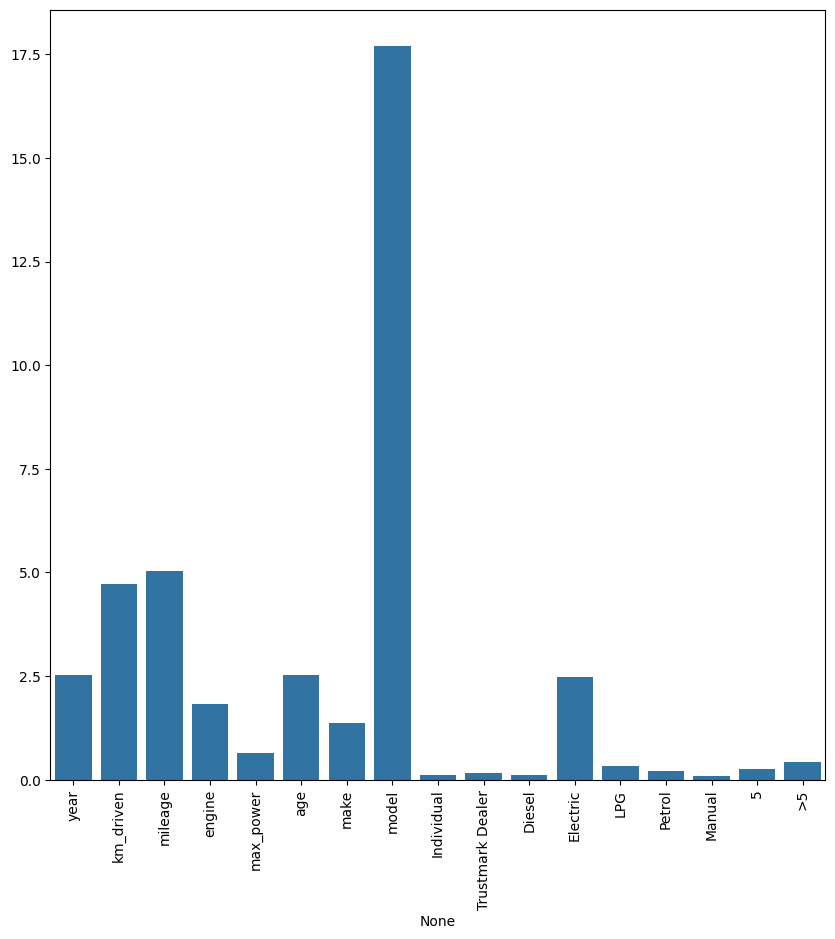

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x = x_train.columns,y = feature_imp)
plt.xticks(rotation=90)
plt.show()

In [37]:
x_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.724138,0.053808,0.142586,0.236671,0.158776,0.275862,0.236566,0.167659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.620690,0.065625,0.104052,0.295468,0.283414,0.379310,0.823407,0.515065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.896552,0.049768,0.201638,0.184834,0.111111,0.103448,0.194048,0.318691,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.931034,0.010034,0.171034,0.177577,0.127214,0.068966,0.178964,0.256955,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.551724,0.074012,0.081897,0.266440,0.201288,0.448276,0.258412,0.122249,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [38]:
class MyLinearRegression() :
    def __init__(self, learning_rate=0.01, iterations=20):
        self.learning_rate = learning_rate
        self.iterations = iterations


    def predict(self, X):
        return np.dot(X, self.W) + self.w0

    def r2_score(self, X, y):
        y_ = self.predict(X)

        ss_res = np.sum((y-y_)**2)
        ss_tot = np.sum((y- y.mean())**2)

        score = 1 - (ss_res/ss_tot)
        return score


    def update_weights(self):
        Y_pred = self.predict( self.X )

        # calculate gradients
        dW =  (2*(self.X.T ).dot(Y_pred - self.Y  ))/self.n

        dw0 =  2*np.sum(Y_pred - self.Y )/self.n

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.w0 = self.w0 - self.learning_rate * dw0

        return self

    def fit(self, X, Y):
        # no_of_training_examples, no_of_features

        self.n, self.d = X.shape

        # weight initialization
        self.W = np.zeros((self.d, 1))
        self.w0 = 0
        self.X = X
        self.Y = Y
        self.error_list=[]

        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()

            Y_pred = X.dot(self.W)+self.w0

            error = np.mean((Y-Y_pred)**2)

            self.error_list.append(error)

        return self


In [39]:
x_train =  x_train.values
x_train.shape


(15856, 17)

In [40]:
y_train = y_train.values
y_train.shape

(15856,)

In [41]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(15856, 1)

In [42]:
my_model = MyLinearRegression(learning_rate=0.2, iterations=300)
my_model.fit(x_train, y_train)

In [43]:
my_model.r2_score(x_train, y_train)

np.float64(0.939268826954847)

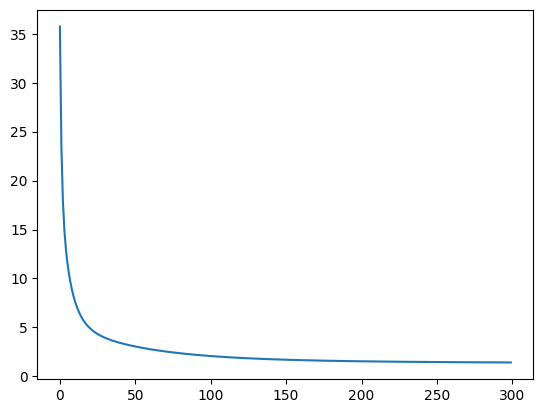

In [44]:
plt.plot(my_model.error_list)

In [45]:
x_test = x_test.values
y_test = y_test.values
y_test = y_test.reshape(-1, 1)

In [46]:
x_test.shape, y_test.shape

((3964, 17), (3964, 1))

In [47]:
my_model.r2_score(x_test,y_test)



np.float64(0.9434648684649733)

In [48]:
x_train

array([[0.72413793, 0.05380834, 0.14258621, ..., 1.        , 1.        ,
        0.        ],
       [0.62068966, 0.06562529, 0.10405172, ..., 0.        , 1.        ,
        0.        ],
       [0.89655172, 0.04976766, 0.20163793, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.75862069, 0.06857768, 0.13189655, ..., 1.        , 1.        ,
        0.        ],
       [0.82758621, 0.04729813, 0.11896552, ..., 1.        , 1.        ,
        0.        ],
       [0.75862069, 0.0605428 , 0.06939655, ..., 1.        , 0.        ,
        1.        ]])

In [49]:
import statsmodels.api as sm

In [50]:
x_sm = sm.add_constant(x_train) # statsmodel default is without intercept, to add we need to add constant

In [51]:
#OLS = ordinary least square [Linear regression model]

model = sm.OLS(y_train, x_sm)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.714e+04
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:20:21   Log-Likelihood:                -24416.
No. Observations:               15856   AIC:                         4.887e+04
Df Residuals:                   15839   BIC:                         4.900e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.828e+12   1.84e+12     -4.259      0.0

#VIF = Variance inflation model


In [52]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((15856, 17), (15856, 1), (3964, 17), (3964, 1))

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [55]:
df.columns[1:]

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make',
       'model', 'Individual', 'Trustmark Dealer', 'Diesel', 'Electric', 'LPG',
       'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [61]:
x_t = pd.DataFrame(x_train, columns=df.columns[1:])
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif


,Features,VIF
0,year,206.91
5,age,20.69
13,Petrol,16.79
10,Diesel,15.87
16,>5,13.32
15,5,12.11
3,engine,6.33
7,model,6.14
4,max_power,5.11
6,make,3.26


In [63]:
x_t.drop(columns='year',inplace=True)

In [64]:
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
14,5,50.93
2,engine,50.53
3,max_power,27.37
9,Diesel,26.81
12,Petrol,22.47
1,mileage,22.44
6,model,16.74
5,make,11.56
15,>5,10.89
13,Manual,8.81


In [65]:
x_t.drop(columns=['5'],inplace=True)

In [66]:
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,engine,47.50
3,max_power,27.09
9,Diesel,23.35
12,Petrol,16.87
1,mileage,16.54
6,model,16.52
5,make,11.56
4,age,8.63
13,Manual,8.61
0,km_driven,3.63


In [67]:
x_t.drop(columns=['engine'],inplace=True)

In [68]:
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
8,Diesel,20.41
2,max_power,17.02
5,model,16.35
1,mileage,16.22
11,Petrol,15.32
4,make,11.43
12,Manual,8.37
3,age,8.27
0,km_driven,3.57
6,Individual,1.79


In [69]:
x_t.drop(columns=['Diesel'],inplace=True)

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_t.columns
vif['VIF'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,max_power,16.21
5,model,15.60
4,make,11.43
1,mileage,10.32
11,Manual,7.89
3,age,7.46
0,km_driven,3.53
10,Petrol,2.14
6,Individual,1.77
12,>5,1.64


In [71]:
model_2 = LinearRegression()
model_2.fit(x_t,y_train)

LinearRegression()

In [72]:
model_2.score(x_t,y_train)

0.9451898250472941

In [73]:
y_hat = model_2.predict(x_t)
errs = y_train - y_hat

<Axes: ylabel='Count'>

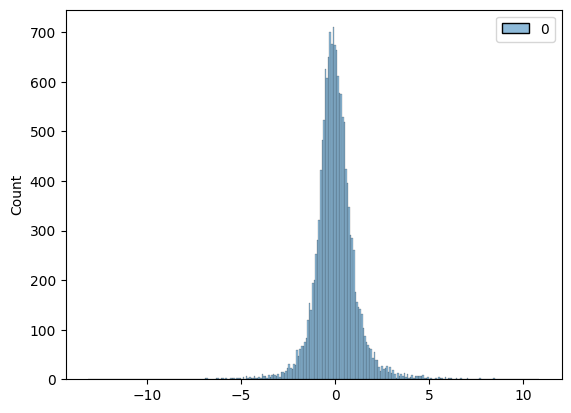

In [74]:
sns.histplot(errs)

In [ ]:
##QQ-Plot/Shapiro

In [75]:
#shapiro : for normality distribution test

from scipy import stats
res = stats.shapiro(errs)
res

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.8991931471040261), pvalue=np.float64(5.217819817695778e-72))

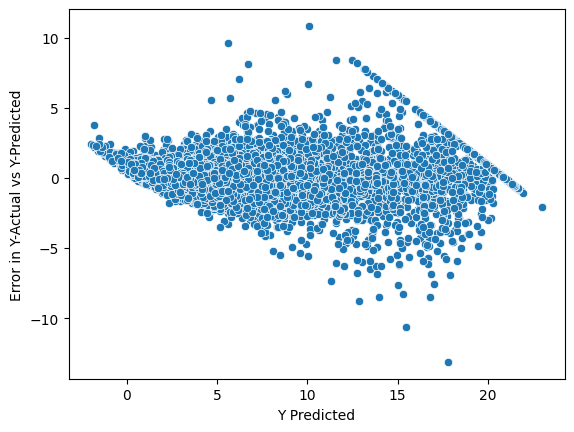

In [79]:
#Heteroscedesticity

sns.scatterplot(x = y_hat.reshape(-1,),y = errs.reshape(-1,))
plt.xlabel('Y Predicted')
plt.ylabel('Error in Y-Actual vs Y-Predicted')
plt.show()